# A. Librerias y rutas

In [25]:
import io
from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from IPython.display import display

# B. Funciones

In [26]:
def get_chrome_driver(remote_url="http://localhost:5555/wd/hub", print_view=False, headless=False, download_path="/home/seluser/Downloads"):

    options = webdriver.ChromeOptions()
    options.add_argument("--no-sandbox")
    options.add_argument("--start-maximized")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("--ignore-certificate-errors")

    # Configurar la ruta de descargas
    prefs = {
        "download.default_directory": download_path,  # Ruta personalizada para descargas
        "download.prompt_for_download": False,  # No preguntar antes de descargar
        "download.directory_upgrade": True,  # Actualizar directorio de descargas
        "safebrowsing.enabled": True  # Evitar bloqueos de descargas peligrosas
    }
    options.add_experimental_option("prefs", prefs)

    # Argumentos opcionales
    if print_view:
        options.add_argument("--disable-print-preview")
    if headless:
        options.add_argument("--headless=new") 

    # Configurar el driver remoto
    driver = webdriver.Remote(
        command_executor=remote_url,
        options=options
    )

    return driver


In [27]:
def take_screenshot(driver):
    screenshot = driver.get_screenshot_as_png() 
    image = Image.open(io.BytesIO(screenshot))  
    display(image) 


# C. Prueba

In [28]:
driver = get_chrome_driver()

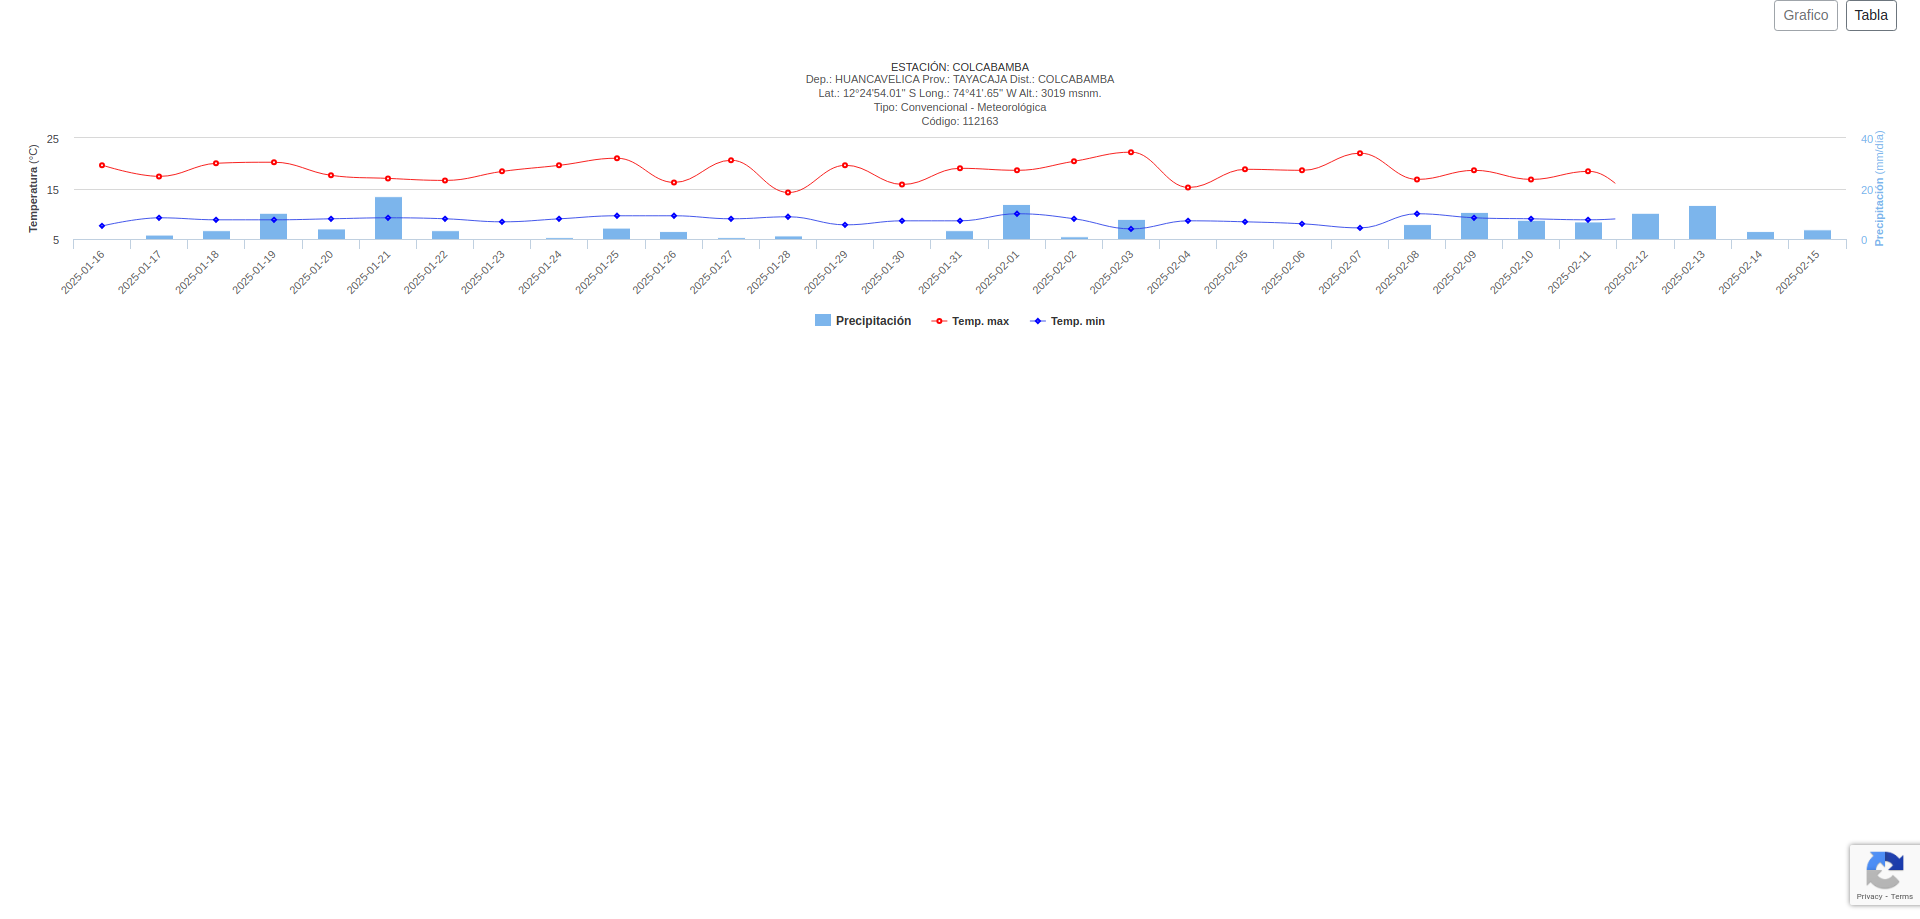

In [29]:
url = 'https://www.senamhi.gob.pe/mapas/mapa-estaciones-2/map_red_graf.php?cod=112163&estado=REAL&tipo_esta=M&cate=CO&cod_old='
driver.get(url)
take_screenshot(driver)

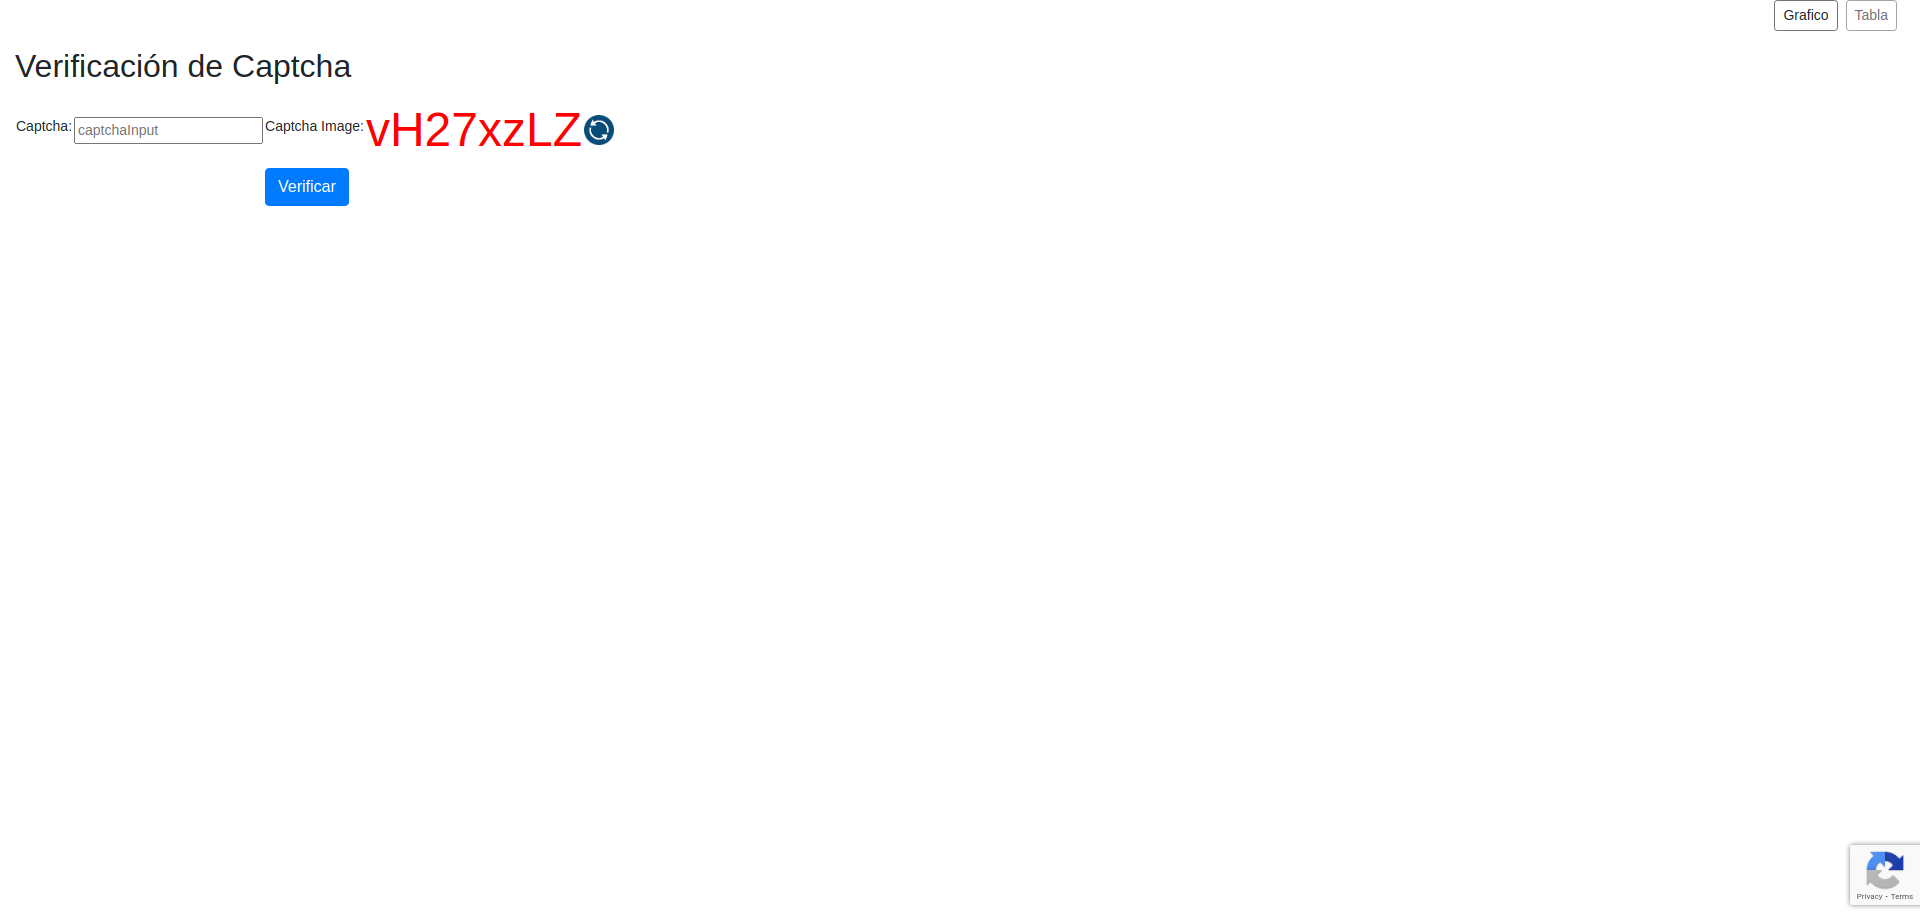

In [30]:
# Click en el botón "Tabla" usando By.ID
driver.find_element(By.ID, "tabl").click()
take_screenshot(driver)

Captcha encontrado: vH27xzLZ


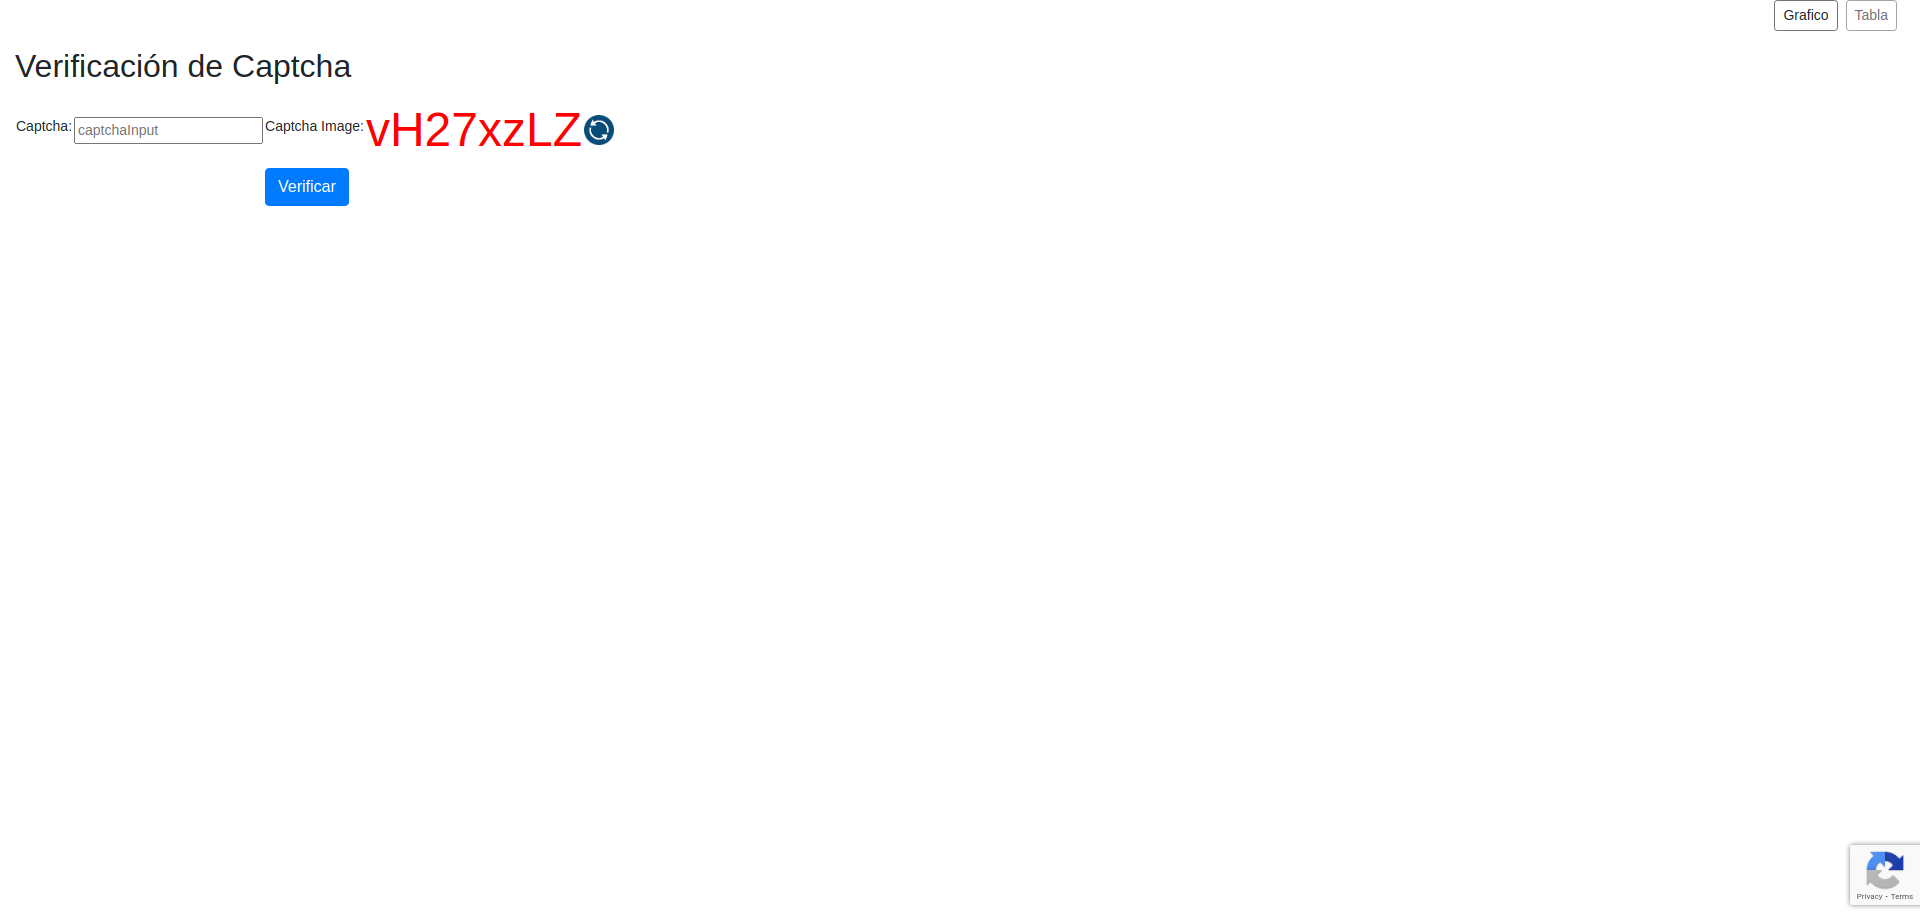

In [31]:
# Extraer el html de la página
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Buscar el elemento del captcha por su tag y atributos característicos
# Típicamente el captcha está en un span con estilo de color rojo y tamaño grande
captcha_element = soup.find('span', {'style': 'color: red; font-size:xxx-large'})
if captcha_element:
    print("Captcha encontrado:", captcha_element.text)
else:
    print("Captcha no encontrado")

take_screenshot(driver)


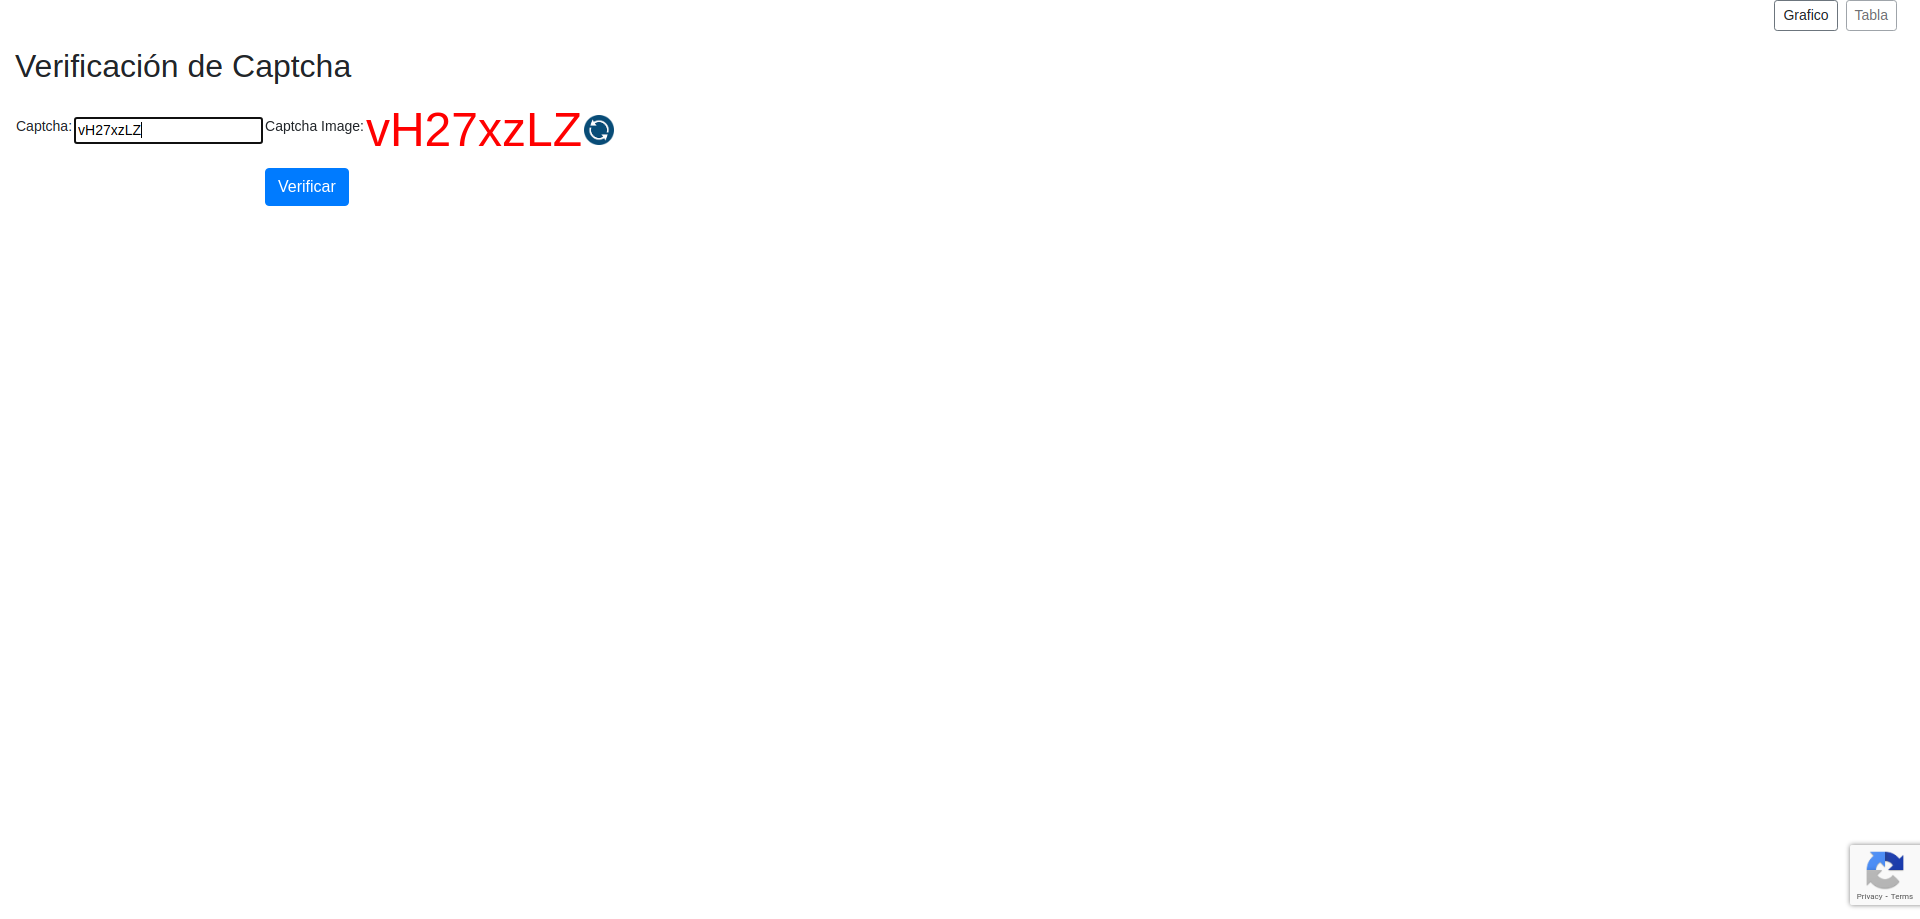

In [32]:
# Encontrar el campo de entrada del captcha por su ID
captcha_input = driver.find_element(By.ID, "captchaInput")

# Ingresar el texto del captcha
captcha_input.send_keys(captcha_element.text)
take_screenshot(driver)

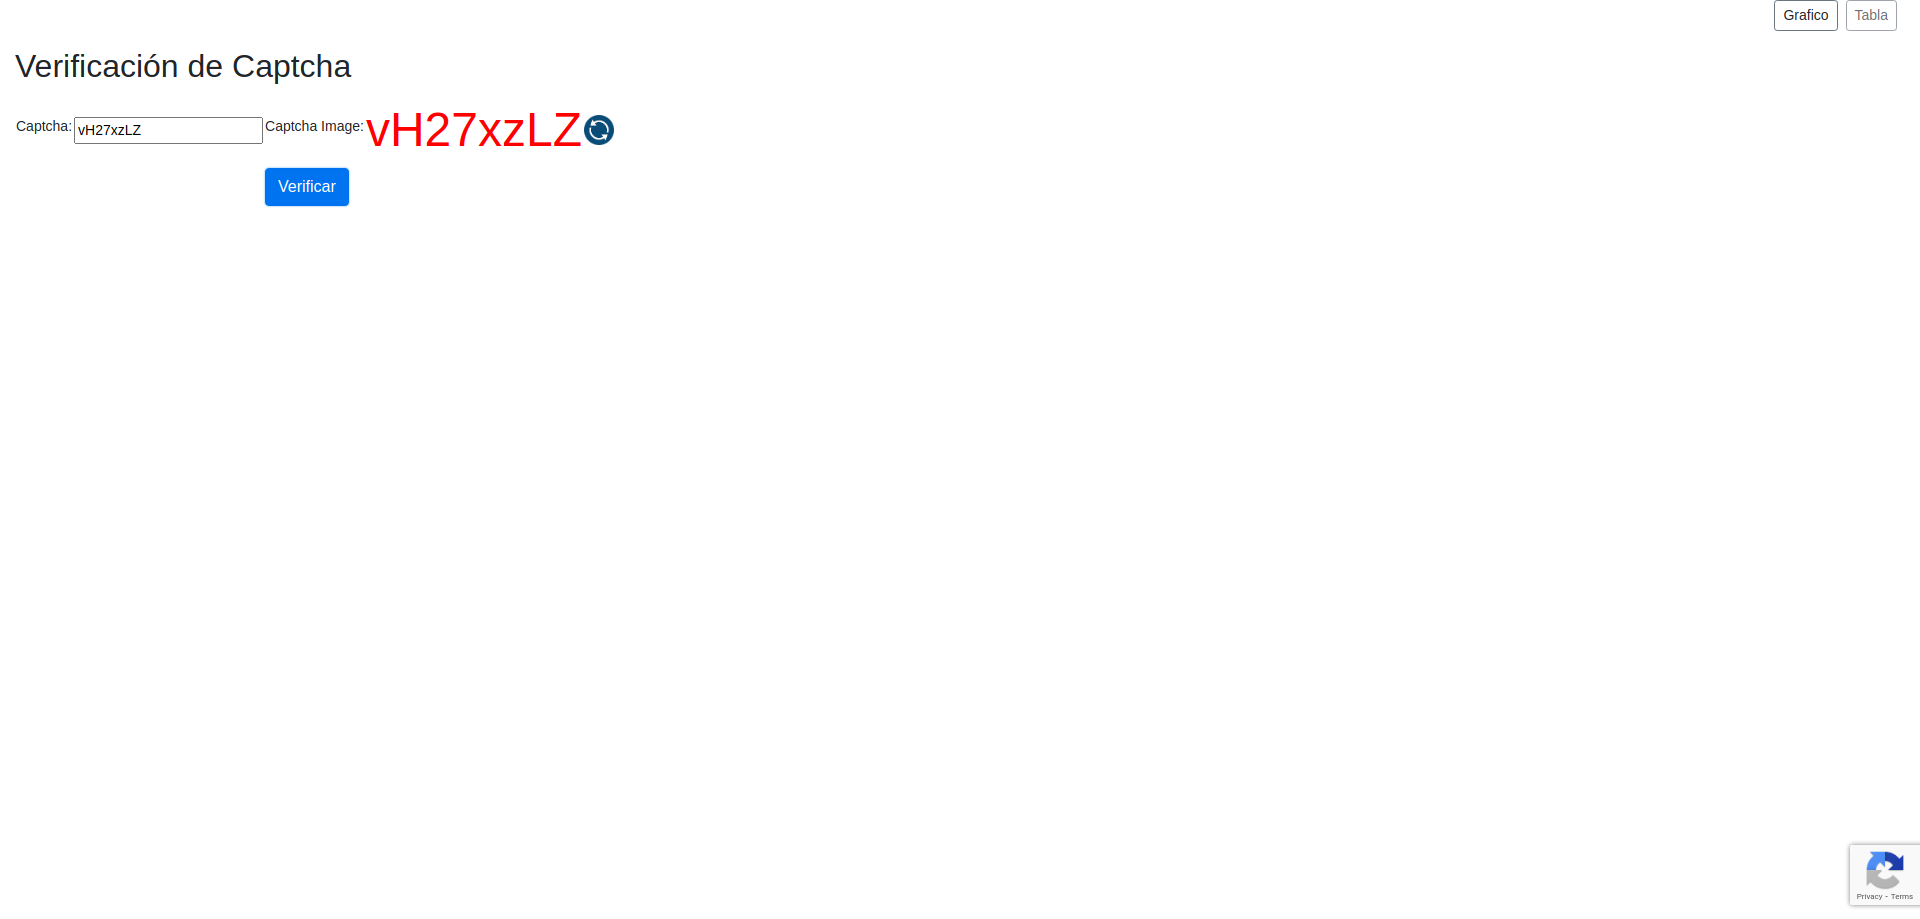

In [33]:
# Click en el botón "Verificar" usando By.ID
driver.find_element(By.ID, "entrar").click()
take_screenshot(driver)

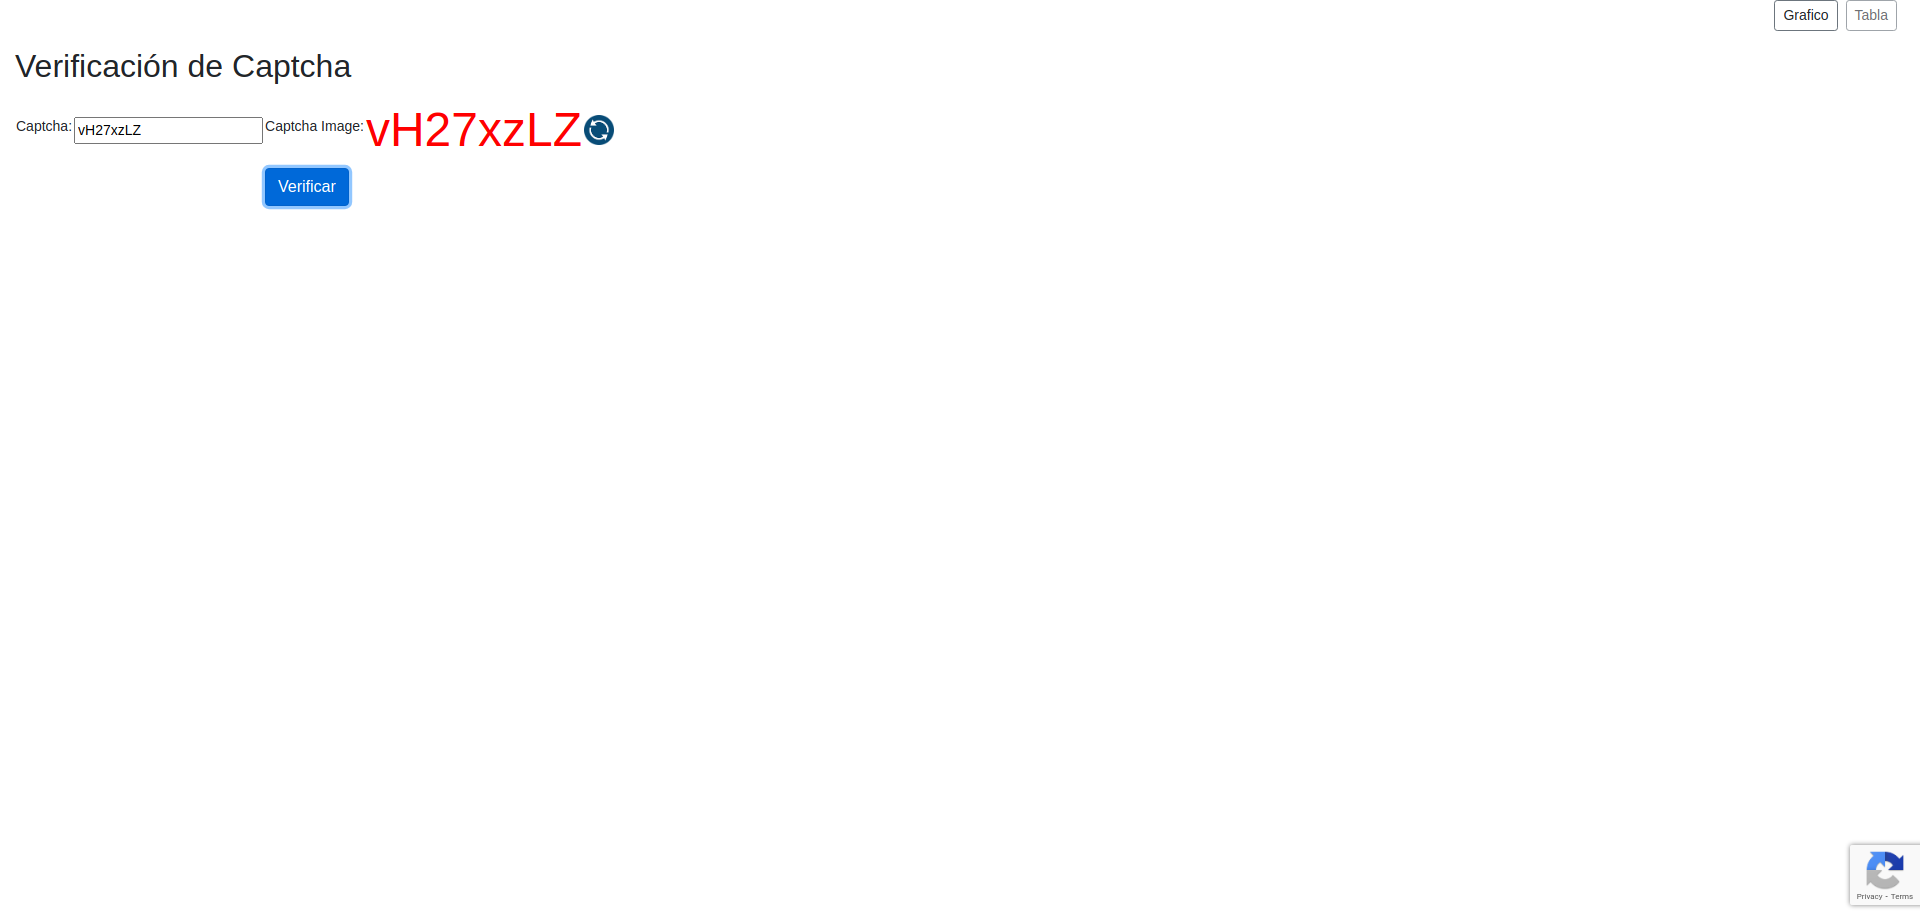

In [34]:
driver.switch_to.frame("contenedor")
take_screenshot(driver)

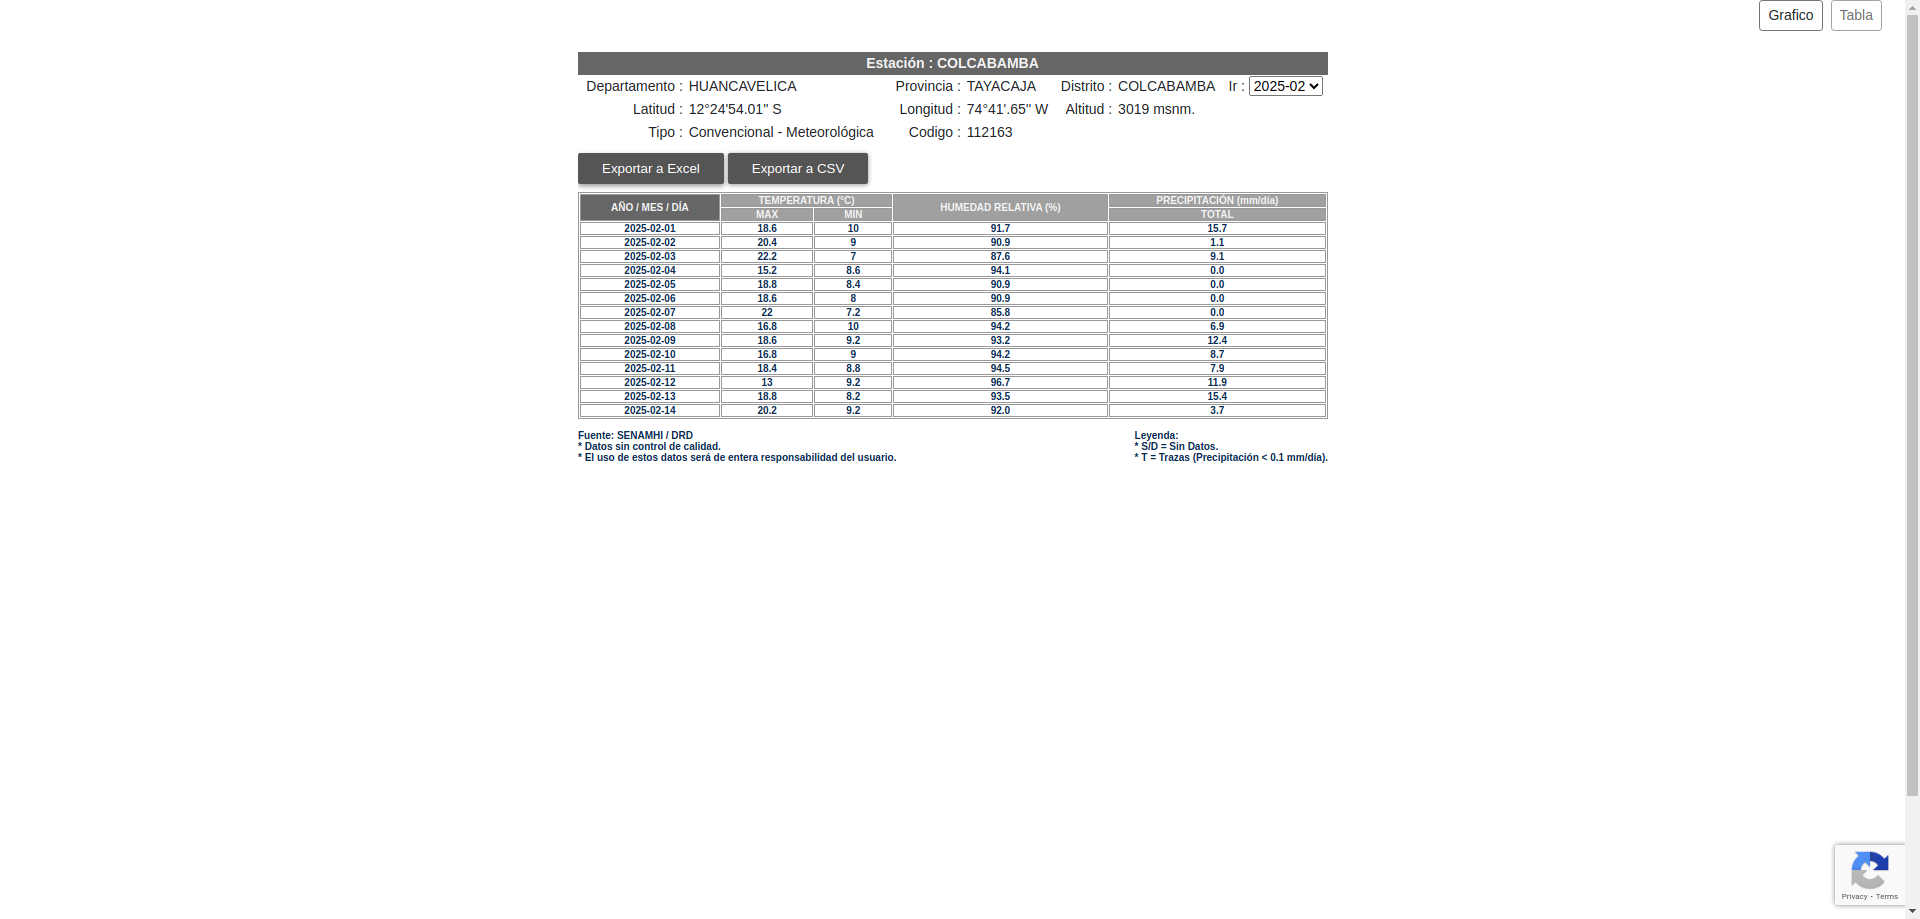

In [35]:
driver.find_element(By.ID, "export101").click()
take_screenshot(driver)

In [36]:
driver.quit()